0. 패키지 불러오기

In [143]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

1. 데이터 불러오기

In [144]:
nov_2019 = pd.read_csv('2019-Nov.csv')
# nov_2019 = pd.read_excel('2019-Nov.xlsx')

In [145]:
nov_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1048575 non-null  object 
 1   event_type     1048575 non-null  object 
 2   product_id     1048575 non-null  int64  
 3   category_id    1048575 non-null  int64  
 4   category_code  716498 non-null   object 
 5   brand          894260 non-null   object 
 6   price          1048575 non-null  float64
 7   user_id        1048575 non-null  int64  
 8   user_session   1048575 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 72.0+ MB


In [146]:
#결측값 확인
nov_2019.isna().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    332077
brand            154315
price                 0
user_id               0
user_session          0
dtype: int64

In [147]:
nov_2019.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631879936,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100859904,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853489920,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810769920,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631879936,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


2. 과제 수행

2-1. 해당 전체 기간에서, KST 기준으로 active user 수가 제일 큰 날짜를 구하기

[진행 방법]
-1. UTC 시간 -> KST 시간으로 새로운 feature 만들기
: datetime 모듈의 timedelta 함수를 사용하면, UTC 로 기록된 시간을 한국시간인 KST 시간으로 변경할 수 있다. 이때, "양수(+) : 과거, 음수(-) : 미래" 로 나타낸다.
따라서, 한국시간(KST)으로 변경하려면 UTC 보다 9 시간이 빠르므로 빼야한다. 
-2. 한국(KST)시간 기준으로  active user 접속 시간이 많은 날짜, 시간대를 각각 구한다. 

In [153]:
# 날짜 분포
time_data = nov_2019['event_time']
time_data_1 = time_data[1].split(" ")[0]
print(time_data_1)

2019-11-01


In [154]:
UTC_TIME = nov_2019['event_time'][1]
print(UTC_TIME)
test = UTC_TIME.replace(' UTC',"")
print("KST : ",datetime.strptime(test, '%Y-%m-%d %H:%M:%S') - timedelta(hours=-9))

2019-11-01 00:00:00 UTC
KST :  2019-11-01 09:00:00


In [157]:
kst_time = list()
for uct_time in nov_2019['event_time']:
    #연도-월-일 시:분:초 UTC -> 연도-월-일 시:분:초 로 변경 ==> "_UTC" 제거
    time = uct_time.replace(" UTC","")
    time = datetime.strptime(time, '%Y-%m-%d %H:%M:%S') - timedelta(hours=-9)
    kst_time.append(time)

In [158]:
# kst_time[0]
# kst_time[-1]

In [159]:
nov_2019['KST_time'] = kst_time

In [160]:
nov_2019.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,KST_time
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631879936,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2019-11-01 09:00:00
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100859904,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,2019-11-01 09:00:00
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853489920,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,2019-11-01 09:00:01
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810769920,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,2019-11-01 09:00:01
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631879936,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,2019-11-01 09:00:01


In [161]:
# 필요한 변수만 추출
KST_nov = nov_2019[['KST_time', 'user_id']]
KST_nov.head()

,KST_time,user_id
0,2019-11-01 09:00:00,520088904
1,2019-11-01 09:00:00,530496790
2,2019-11-01 09:00:01,561587266
3,2019-11-01 09:00:01,518085591
4,2019-11-01 09:00:01,558856683


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


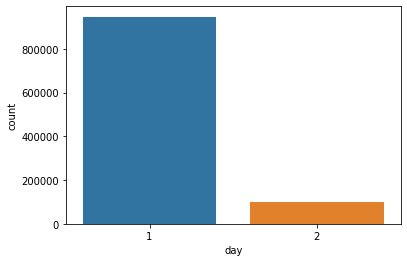

In [231]:
# 가장 큰 날짜 결과 추출
KST_nov['day']= [time.day for time in nov_2019['KST_time']]
sns.countplot(x='day', data=KST_nov)

In [230]:
result_1_1 = KST_nov[['day','user_id']].groupby('day').count()
result_1_1.sort_values(by="user_id", ascending=False)
# 11/1 접속자 수 : 947,011
# 11/2 접속자 수 : 101,564

,user_id
day,
1,947011
2,101564


In [229]:
# 한국시간(KST) 기준으로 시:분:초 단위에서 이용 유저 COUNT 하여, 제일 큰 날짜(시간) 추출.
result_1 = KST_nov[['KST_time','user_id']].groupby('KST_time').count()
result_1.sort_values(by="user_id", ascending=False).head(1)

,user_id
KST_time,
2019-11-01 23:18:02,96


2-2. 2-1의 날짜에서, 가장 긴 세션 10개에 대해 "user_id, session_id, 세션시간"를 구하세요
- TOP10 추출 : 세션 시간이 긴 사용자 10분 추출
- 필요한 변수 : user_id, session_id(=user_session), 세션시간

[진행 방법]
#가장 긴 세션은 user_session 을 count하여 10개 추출한 후, 그 session의 시간을 구한다. 
-1. user_session을 group_by 로, 접속한 날짜에서 가장 늦게까지 찍힌 시간 - 짧은 시간 = 세션시간 이 가장 긴 사용자 중 10명을 추출한다
-2. 세션이 같은 것끼리 그룹으로 묶고, 가장 큰 시간 - 작은 시간으로 한 세션시간을 구한다. 
이때, 세션시간을 구하는 방법은 datetime 형태에서 빼면된다.

In [ ]:
# 필요한 변수만 추출
KST_nov = nov_2019[['KST_time','user_id', 'user_session']]

In [ ]:
# user_session == user_id 이므로 user_id 기준으로 kst 개수 추출
active_user_count = KST_nov.groupby(['user_session','user_id']).count()
active_user_top10 = active_user_count.sort_values(by='KST_time', ascending=False).head(10)

In [ ]:
active_user_top10

,,KST_time
user_session,user_id,
4488e77a-9901-4c4b-b162-47a224ceab51,537972582,504
e6d2aed7-d07f-48af-867a-8741e2b24f1b,539585530,246
8d984366-317d-4d77-8b41-6473de3b9249,518449281,211
135867a0-6382-4c86-8a8c-821796673484,559249905,191
766722cc-ca14-4f2d-a5f3-4a6baef5369d,523582366,158
bad2fbec-4fda-44c7-b654-0b7a2a887560,512883294,155
2d5298e4-108d-4cdb-944f-df48b52e7fa9,513998518,150
0c239db5-422b-4198-b76a-035ffcc275fa,513002539,143
e46bffd0-fe44-41fc-b0e5-e5578a621f88,514127132,134


In [ ]:
# 계층적 인덱스 변환
active_user_top10 = active_user_top10.reset_index()

In [ ]:
# user_session, user_id 를 기준으로 추가적으로 필요한 변수인, KST_time 값을 merge를 통해 가져온다.
result_data = pd.merge(KST_nov, active_user_top10, how = 'right',left_on=['user_session','user_id'], right_on=['user_session','user_id'])

In [ ]:
result_data.keys() # 필요한 변수가 잘 들어왔는지 확인

Index(['KST_time_x', 'user_id', 'user_session', 'KST_time_y'], dtype='object')

In [ ]:
# 필요한 변수 추출
result_data = result_data[['KST_time_x', 'user_id', 'user_session']]

In [ ]:
result_data

,KST_time_x,user_id,user_session
0,2019-11-01 12:38:00,537972582,4488e77a-9901-4c4b-b162-47a224ceab51
1,2019-11-01 12:39:34,537972582,4488e77a-9901-4c4b-b162-47a224ceab51
2,2019-11-01 12:40:33,537972582,4488e77a-9901-4c4b-b162-47a224ceab51
3,2019-11-01 12:40:57,537972582,4488e77a-9901-4c4b-b162-47a224ceab51
4,2019-11-01 12:41:19,537972582,4488e77a-9901-4c4b-b162-47a224ceab51
...,...,...,...
2021,2019-11-01 14:10:02,541500707,0e6417d3-428c-427b-9b92-b4c8e9b8c1c0
2022,2019-11-01 14:11:01,541500707,0e6417d3-428c-427b-9b92-b4c8e9b8c1c0
2023,2019-11-01 14:11:20,541500707,0e6417d3-428c-427b-9b92-b4c8e9b8c1c0
2024,2019-11-01 14:11:39,541500707,0e6417d3-428c-427b-9b92-b4c8e9b8c1c0


In [ ]:
# aggregate 함수를 이용하여 조건별 가장 먼저 기록한 시간 min, 가장 나중에 기록한 시간 max 를 구한다
result = result_data.groupby(['user_session','user_id'])['KST_time_x'].agg([max,min])

In [ ]:
result.reset_index()

,user_session,user_id,max,min
0,0c239db5-422b-4198-b76a-035ffcc275fa,513002539,2019-11-01 12:54:04,2019-11-01 12:02:24
1,0e6417d3-428c-427b-9b92-b4c8e9b8c1c0,541500707,2019-11-01 14:12:24,2019-11-01 12:24:58
2,135867a0-6382-4c86-8a8c-821796673484,559249905,2019-11-01 21:50:34,2019-11-01 16:23:34
3,2d5298e4-108d-4cdb-944f-df48b52e7fa9,513998518,2019-11-01 22:02:16,2019-11-01 21:28:32
4,4488e77a-9901-4c4b-b162-47a224ceab51,537972582,2019-11-01 16:15:37,2019-11-01 12:38:00
5,766722cc-ca14-4f2d-a5f3-4a6baef5369d,523582366,2019-11-01 22:49:57,2019-11-01 21:13:04
6,8d984366-317d-4d77-8b41-6473de3b9249,518449281,2019-11-02 01:00:29,2019-11-01 22:08:42
7,bad2fbec-4fda-44c7-b654-0b7a2a887560,512883294,2019-11-01 15:04:47,2019-11-01 13:17:42
8,e46bffd0-fe44-41fc-b0e5-e5578a621f88,514127132,2019-11-01 14:48:53,2019-11-01 11:31:15
9,e6d2aed7-d07f-48af-867a-8741e2b24f1b,539585530,2019-11-01 18:30:52,2019-11-01 15:26:11


In [ ]:
#시간 정렬 후, 사용시간
def session_time_diff(max, min):
    end_time = max
    start_time = min
    time_diff = end_time - start_time 
    return time_diff

In [ ]:
# 가장 나중에 기록된 시간 - 가장 먼저 기록된 시간 을 계산하여 해당 user_session당 사용된 session 시간을 구한다
result['time_diff'] = session_time_diff(result['max'],result['min'])

In [ ]:
result_2 = result.reset_index()

In [ ]:
result_2 = result_2[['user_id','user_session','time_diff']]

In [ ]:
result_2
# user_id,	user_session(session_id),	time_diff(session 시간)

,user_id,user_session,time_diff
0,513002539,0c239db5-422b-4198-b76a-035ffcc275fa,0 days 00:51:40
1,541500707,0e6417d3-428c-427b-9b92-b4c8e9b8c1c0,0 days 01:47:26
2,559249905,135867a0-6382-4c86-8a8c-821796673484,0 days 05:27:00
3,513998518,2d5298e4-108d-4cdb-944f-df48b52e7fa9,0 days 00:33:44
4,537972582,4488e77a-9901-4c4b-b162-47a224ceab51,0 days 03:37:37
5,523582366,766722cc-ca14-4f2d-a5f3-4a6baef5369d,0 days 01:36:53
6,518449281,8d984366-317d-4d77-8b41-6473de3b9249,0 days 02:51:47
7,512883294,bad2fbec-4fda-44c7-b654-0b7a2a887560,0 days 01:47:05
8,514127132,e46bffd0-fe44-41fc-b0e5-e5578a621f88,0 days 03:17:38
9,539585530,e6d2aed7-d07f-48af-867a-8741e2b24f1b,0 days 03:04:41


2-3. 1의 날짜의 15분단위로 active user 수를 구하세요

[진행 방법]
-1. 새로운 feature를 만든다. 시간 값에서 분단위로 
00:01~15:00 -> 1
15:01~30:00 -> 2
30:01~45:00 -> 3
45:01~00:00 -> 4
로 새로운 변수를 만든다. 
-2. 시각화 (x : 새로운 feature, y : count(user_id)) 

In [ ]:
# 필요한 변수만 추출한다
KST_nov = nov_2019[['KST_time', 'user_id']]

In [ ]:
# resample 함수를 이용하여 15분 간격으로 시간대별 사용자 수를 계산한다.
result_3 = KST_nov.set_index('KST_time').resample('15T').count()

In [ ]:
result_3

,user_id
KST_time,
2019-11-01 09:00:00,2248
2019-11-01 09:15:00,2415
2019-11-01 09:30:00,3038
2019-11-01 09:45:00,3186
2019-11-01 10:00:00,2350
...,...
2019-11-02 00:00:00,24188
2019-11-02 00:15:00,25198
2019-11-02 00:30:00,25350


2-4. 1의 날짜에서 view → cart → purchase 이벤트 진행에 따른 funnel 수치를 구하세요

-1. event_type 별 분포표 : 막대그래프, 파이차트
-2. 제공된 데이터의 시간대별 구매 활동 분포표

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
# 필요한 변수만 추출
event_user_nov = nov_2019[['event_type','user_id']]

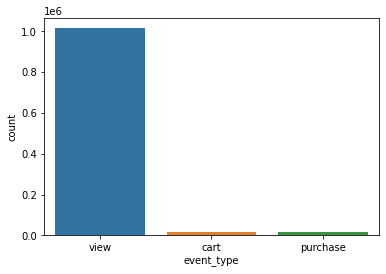

In [164]:
# event_type별 user 분포 1
sns.countplot(x='event_type', data=event_user_nov);
# event_type : view, cart, remove_from_cart, purchase

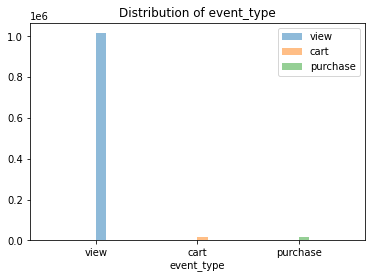

In [178]:
# event_type별 user 분포 2
category_event_nov = nov_2019[['event_type','category_code']]
plt.hist('event_type', data=category_event_nov[category_event_nov['event_type'] == 'view'], alpha=0.5, label='view');
plt.hist('event_type', data=category_event_nov[category_event_nov['event_type'] == 'cart'], alpha=0.5, label='cart');
plt.hist('event_type', data=category_event_nov[category_event_nov['event_type'] == 'purchase'], alpha=0.5, label='purchase');
plt.title('Distribution of event_type');
plt.xlabel('event_type');
plt.legend();

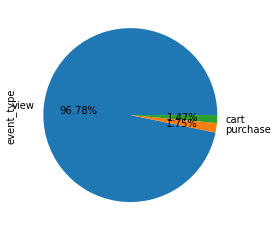

In [165]:
# event_type별 user 분포 3
event_type_cnt = event_user_nov.event_type.value_counts()
event_type_cnt.plot.pie(autopct='%.2f%%')

In [177]:
# 제공된 데이터의 시간대별 구매 활동 분포표
# 필요한 데이터만 추출
KST_event_nov = nov_2019[['event_type','KST_time']]
# 시간대별 user 수
time_type_cnt = KST_event_nov.set_index('KST_time').resample('1H').count()
#계층 구조 제거
time_type_cnt = time_type_cnt.reset_index()
time_type_cnt

,KST_time,event_type
0,2019-11-01 09:00:00,10887
1,2019-11-01 10:00:00,14000
2,2019-11-01 11:00:00,32498
3,2019-11-01 12:00:00,49348
4,2019-11-01 13:00:00,61480
5,2019-11-01 14:00:00,73450
6,2019-11-01 15:00:00,76155
7,2019-11-01 16:00:00,79426
8,2019-11-01 17:00:00,79818
9,2019-11-01 18:00:00,76812


In [211]:
# 제공된 데이터의 시간대별 구매 활동 구하기 이전 시간만 기록된 새로운 변수 생성.
KST_event_nov = nov_2019[['event_type','KST_time','user_id']]
print(KST_event_nov['event_type'][0])
# user 활동 시간대 새로운 변수 생성
KST_event_nov['hour']= [time.hour for time in KST_event_nov['KST_time']]
KST_event_nov.head()

view


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


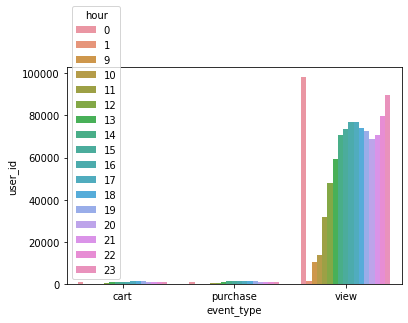

In [204]:
# 제공된 데이터의 시간대별 구매 활동 막대그래프
event_group_hour = KST_event_nov.groupby(['event_type','hour'])['user_id'].count().reset_index()
event_group_hour.head()
sns.barplot(x='event_type', y='user_id', hue='hour',data=event_group_hour )